In [196]:
import numpy as np
import pandas as pd
#!pip install openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

### We will load our dataset first and then see some records of it using head. 

In [197]:
df = pd.read_excel("C:\\Users\\admin\\Desktop\\IITKGP\\LAB\\Assignment 2\\Real_estate_valuation_dataset.xlsx")

In [198]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### We will remove the first column which is just a number column and not needed in our analysis. In general, Including a transaction date in a correlation matrix typically does not make mathematical sense because dates are ordinal variables, not continuous numerical values with meaningful magnitudes for correlation. But in our case transaction date is already transformed into ordinal continuous, and thus, it can be used for our analysis.

In [199]:
df.drop("No", axis = 1,inplace = True)

In [200]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### using info() function, we will get a concise summary of our DataFrame, including the number of non-null values, data types of columns.

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


#### Raw latitude and longitude are often not meaningful in a correlation matrix and, thus, for our linear model. Instead, derive features (e.g., distance clusters) are used to better capture their relationships with other variables. But still we are taking them into our model for our intial stage.

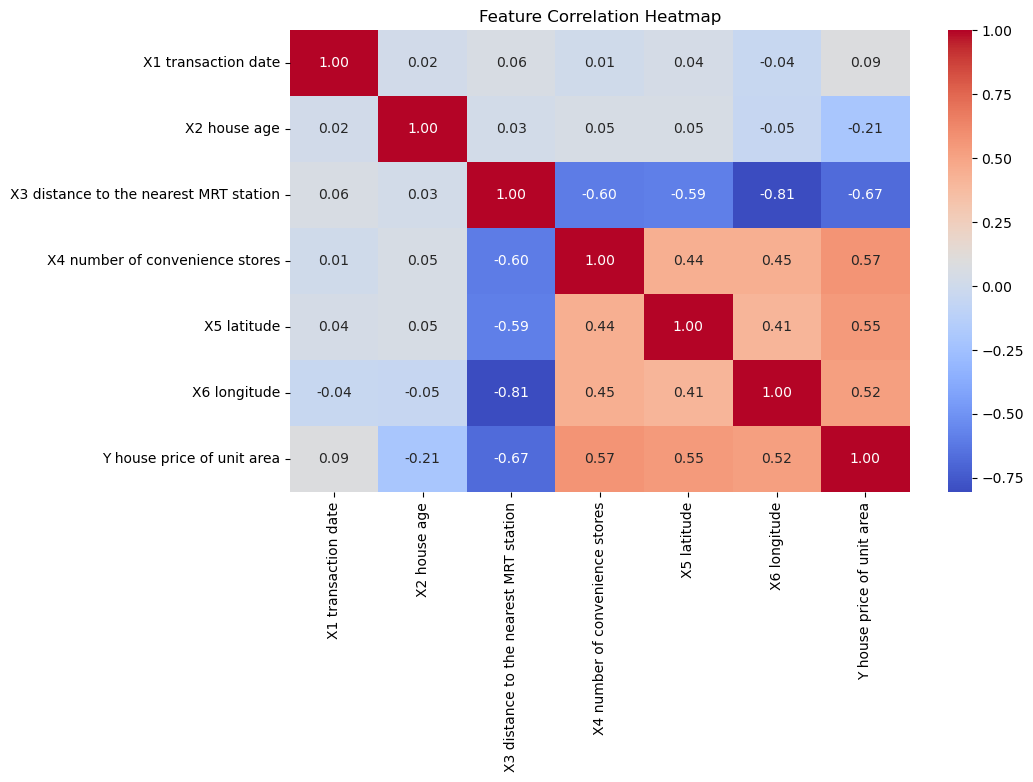

In [202]:
# Feature Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Now, to start with linear regression, we need to separate independent and target variables. We extract the feature column names from a DataFrame by first retrieving all column names using the columns attribute and then removing the target variable, "Y house price of unit area," from the list of features to ensure only independent variables are considered for model training.

In [203]:
features = list(df.columns)
features.remove("Y house price of unit area")
print(features)
y = df["Y house price of unit area"]

['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


In [204]:
import statsmodels.api as sm

### to include an intercept term in the model, which accounts for the baseline value when all predictors are zero.

In [205]:
X = sm.add_constant(df[features])
X.head()

,const,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1.0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,1.0,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,1.0,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,1.0,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,1.0,2012.833333,5.0,390.56840,5,24.97937,121.54245


#### we will split our data into training and testing data in 7:3 ratio 

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

#### We fit an Ordinary Least Squares (OLS) regression model(a linear equation) using the statsmodels library. The sm.OLS() function takes the dependent variable (y_train) and the independent variables (X_train) as inputs. The .fit() method is then called to estimate the model parameters by minimizing the sum of squared residuals. 

In [207]:
real_estate_lm = sm.OLS(Y_train,X_train).fit()

#### NOw we print our fitted parameters and analyse our model using various statistical metrics such as coefficients, p-values, and R-squared values.

In [208]:
real_estate_lm.params

const                                    -11355.385620
X1 transaction date                           5.850147
X2 house age                                 -0.242551
X3 distance to the nearest MRT station       -0.005139
X4 number of convenience stores               1.074534
X5 latitude                                 239.100477
X6 longitude                                -52.236597
dtype: float64

In [209]:
real_estate_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Ordinary least squares
=================================================================================================
Model:                     OLS                               Adj. R-squared:            0.577    
Dependent Variable:        Y house price of unit area        AIC:                       2097.8450
Date:                      2025-01-28 00:01                  BIC:                       2123.5100
No. Observations:          289                               Log-Likelihood:            -1041.9  
Df Model:                  6                                 F-statistic:               66.59    
Df Residuals:              282                               Prob (F-statistic):        3.25e-51 
R-squared:                 0.586                             Scale:                     81.221   
-------------------------------------------------------------------------------------------------
                                          Coef.     Std.Err.    t    P>|t|     [0.025     0.975] 
-------------------------------------------------------------------------------------------------
const                                  -11355.3856 8527.5702 -1.3316 0.1841 -28141.1562 5430.3850
X1 transaction date                         5.8501    1.8905  3.0945 0.0022      2.1289    9.5714
X2 house age                               -0.2426    0.0468 -5.1791 0.0000     -0.3347   -0.1504
X3 distance to the nearest MRT station     -0.0051    0.0009 -5.7518 0.0000     -0.0069   -0.0034
X4 number of convenience stores             1.0745    0.2275  4.7226 0.0000      0.6267    1.5224
X5 latitude                               239.1005   52.1713  4.5830 0.0000    136.4059  341.7950
X6 longitude                              -52.2366   62.1023 -0.8411 0.4010   -174.4795   70.0064
-------------------------------------------------------------------------------------------------
Omnibus:                       203.379                 Durbin-Watson:                    2.013   
Prob(Omnibus):                 0.000                   Jarque-Bera (JB):                 3694.480
Skew:                          2.573                   Prob(JB):                         0.000   
Kurtosis:                      19.743                  Condition No.:                    38191913
=================================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+07. This might indicate                that there are
strong multicollinearity or other numerical                problems.
"""

### Analysis of our model
#### The variables X1 transaction date, X2 house age, X3 distance to MRT station, X4 number of convenience stores, and X5 latitude have statistically significant p-values (p < 0.05), meaning they have a meaningful influence on house prices. The intercept (constant term) and X6 longitude have p-values greater than 0.05, indicating they are not statistically significant in predicting house prices. The model explains 58.6% of the variance in the target variable, which suggests a moderate fit. Also over all p-value is statistically significant shows good model fit.

### Refinement of our model
#### we will remove the insignificant features such as intercept (constant term) and X6 longitude and then fit again and also we will explore furthere the non-linear relationship between variables. Though P-value of latitude is significant but as its not meaningful and we try to do model our data without that feature too.

In [210]:
imp_features = list(set(features) -set(["X6 longitude","X5 latitude"]))
imp_features

['X2 house age',
 'X1 transaction date',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores']

In [211]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Step 1: Split the data
X = df[imp_features]
Y = df["Y house price of unit area"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 2: Add constant column to X_train for the intercept
X_train = sm.add_constant(X_train)

# Step 3: Fit the linear regression model
linear_model = sm.OLS(Y_train, X_train).fit()

# Step 4: Add constant column to X_test for the intercept
X_test = sm.add_constant(X_test)

# Step 5: Predict using the trained model
Y_pred = linear_model.predict(X_test)

# Step 6: Print the model summary
print(linear_model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.553
Model:                                    OLS   Adj. R-squared:                  0.547
Method:                         Least Squares   F-statistic:                     87.82
Date:                        Tue, 28 Jan 2025   Prob (F-statistic):           1.78e-48
Time:                                00:01:32   Log-Likelihood:                -1053.1
No. Observations:                         289   AIC:                             2116.
Df Residuals:                             284   BIC:                             2135.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### We can see clearly now that our model is now explaining around 55% of variance and thus it is a moderate good fit. All the predictor variables are significant.

In [212]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE: Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {rmse}")

# MAPE: Mean Absolute Percentage Error
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print(f"MAPE: {mape}%")

# Accuracy: Defined as (1 - MAPE) if y_test is non-zero
accuracy = 100 - mape
print(f"Accuracy: {accuracy}%")

RMSE: 8.641848321401408
MAPE: 22.700888531436703%
Accuracy: 77.2991114685633%


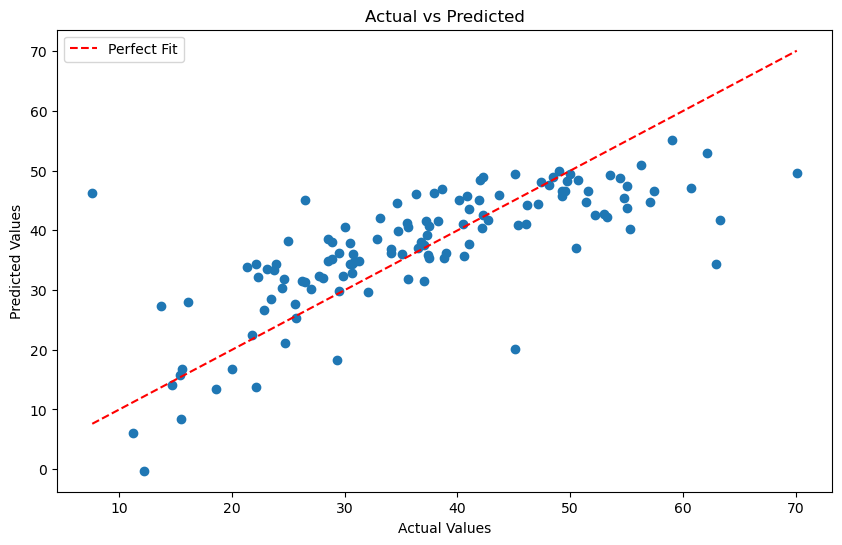

In [213]:
# Plot the actual vs predicted scatter plot
plt.figure(figsize = (10,6))
plt.title('Actual vs Predicted')
plt.scatter(Y_test,Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Now, We will check the normality assumptions to check the fit of linear model.

## 1. QQ Plot

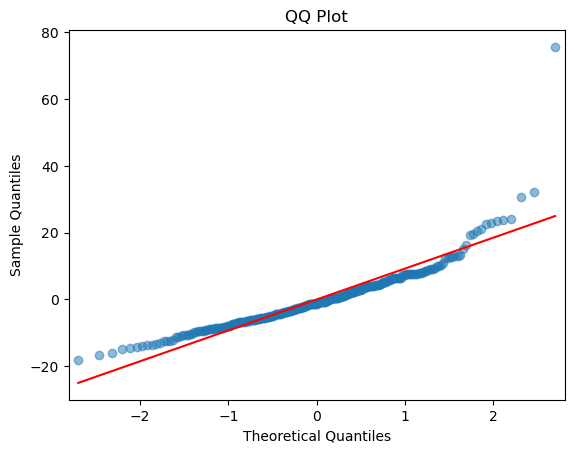

In [214]:
from statsmodels.graphics.gofplots import qqplot

# Generate the QQ plot
residuals = linear_model.resid
qqplot(residuals, line="s", alpha=0.5)
plt.title("QQ Plot")
plt.show()

#### The Q-Q plot is used to assess whether the residuals of a regression model follow a normal distribution, which is an important assumption in linear regression for valid hypothesis testing and confidence intervals. The plots show a clear deviation from normality, suggesting that the linear regression model might not fit the data best. The Residual vs. fitted values plot shows how residuals change as a function of the fitted values. It's used to check for homoscedasticity (constant variance of residuals) and linearity of the model. The spread of residuals increases as fitted values increase, it indicates heteroscedasticity (non-constant variance), which violates the assumption of homoscedasticity

## 2. Residuals vs Fitted Plot

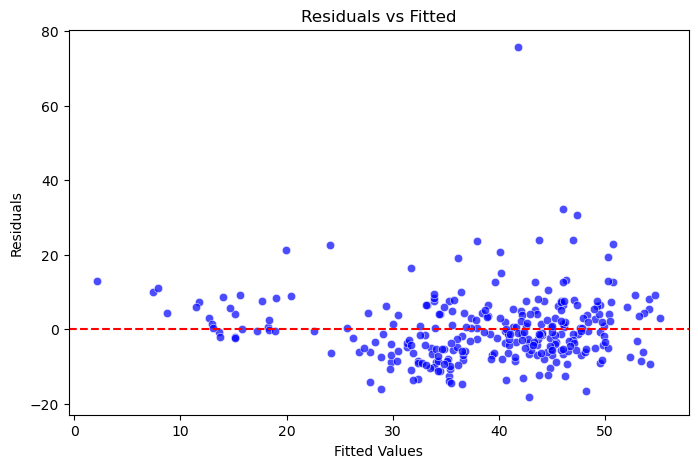

In [227]:
# Residuals
residuals = linear_model.resid
fitted_values = linear_model.fittedvalues

# 1. Residuals vs Fitted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, color="blue", alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

## 3. Scale-Location Plot

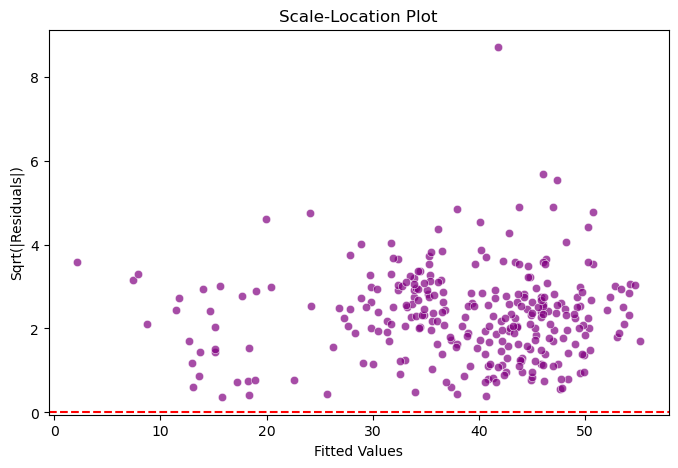

In [228]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=np.sqrt(np.abs(residuals)), color="purple", alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt(|Residuals|)")
plt.title("Scale-Location Plot")
plt.show()

## 4. Cook's Distance Plot

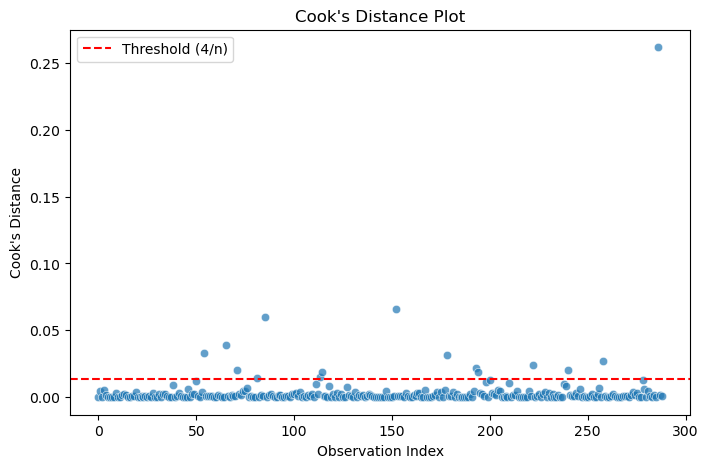

In [230]:
influence = linear_model.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=range(len(cooks_d)), y=cooks_d, alpha=0.7)
plt.axhline(4 / len(cooks_d), color="red", linestyle="--", label="Threshold (4/n)")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()

## 5. Influence Plot

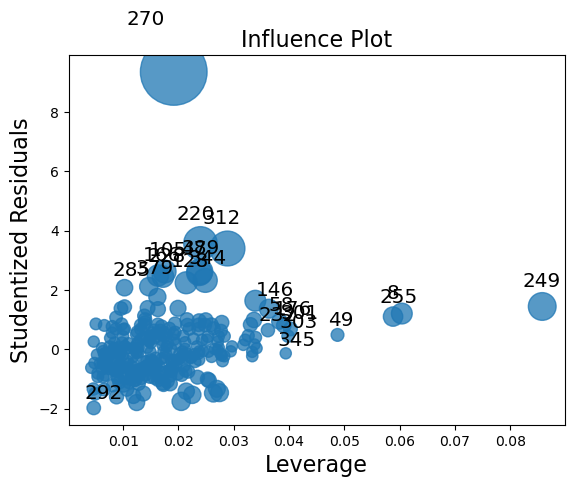

In [216]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(linear_model)
plt.show()

#### The graph between standardized residuals and leverage(Measures the influence of each data point on the regression model. High leverage points are far from the mean of the independent variables.) The contours represent Cook's distance( Indicates how much a data point affects the regression coefficients. Points outside Cook's Distance contours are influential and need to be checked.)
#### We can clearly see high leverage points(far right on x-axis) we will investigate about the validity of these points. We can also see the outliers( residuals dar from 0), which shows poor model fit, and from the contour, we can see they are affecting our model fit.
#### The pattern is not random and indicate potential model misspecification, heteroscedasticity, or non-linearity.

In [217]:
df.iloc[270,:] #checking high leverage points

X1 transaction date                       2013.333333
X2 house age                                10.800000
X3 distance to the nearest MRT station     252.582200
X4 number of convenience stores              1.000000
X5 latitude                                 24.974600
X6 longitude                               121.530460
Y house price of unit area                 117.500000
Name: 270, dtype: float64

# Now Applying Polynoimal Regression with degree 2

In [218]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Step 1: Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Step 2: Add intercept (constant column) for Statsmodels
X_train_poly = sm.add_constant(X_poly)

# Step 3: Fit the model
poly_model = sm.OLS(y_train, X_poly).fit()

# Step 4: Transform test data to polynomial features
X_test_poly = poly.transform(X_test)

# Step 5: Add constant column to X_test_poly for the intercept
X_test_poly = sm.add_constant(X_test_poly)

# Step 6: Predict using the trained model
Y_pred = poly_model.predict(X_test_poly)

# Step 7: Print model summary
print(poly_model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.638
Model:                                    OLS   Adj. R-squared:                  0.621
Method:                         Least Squares   F-statistic:                     37.35
Date:                        Tue, 28 Jan 2025   Prob (F-statistic):           3.53e-53
Time:                                00:01:33   Log-Likelihood:                -1022.4
No. Observations:                         289   AIC:                             2073.
Df Residuals:                             275   BIC:                             2124.
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [219]:
print(poly.get_feature_names_out())

['const' 'X2 house age' 'X1 transaction date'
 'X3 distance to the nearest MRT station'
 'X4 number of convenience stores' 'const^2' 'const X2 house age'
 'const X1 transaction date'
 'const X3 distance to the nearest MRT station'
 'const X4 number of convenience stores' 'X2 house age^2'
 'X2 house age X1 transaction date'
 'X2 house age X3 distance to the nearest MRT station'
 'X2 house age X4 number of convenience stores' 'X1 transaction date^2'
 'X1 transaction date X3 distance to the nearest MRT station'
 'X1 transaction date X4 number of convenience stores'
 'X3 distance to the nearest MRT station^2'
 'X3 distance to the nearest MRT station X4 number of convenience stores'
 'X4 number of convenience stores^2']


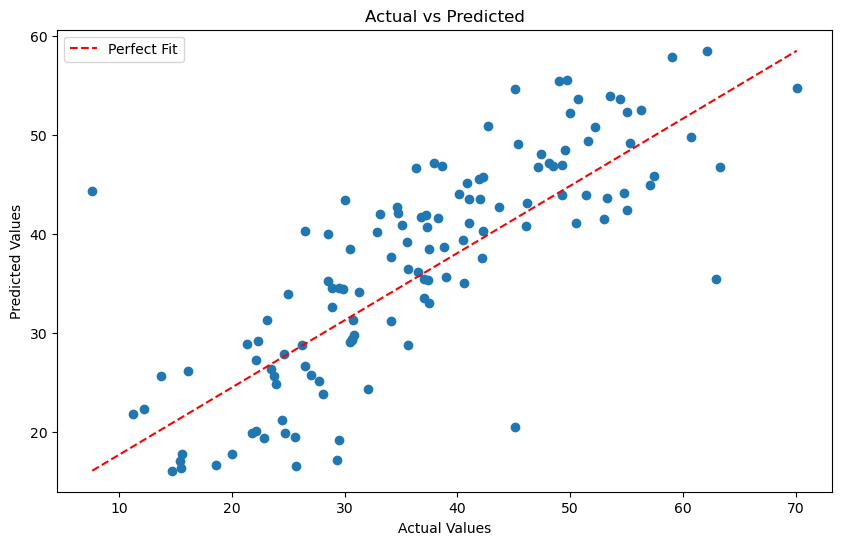

In [220]:
# Plot the actual vs predicted scatter plot
plt.figure(figsize = (10,6))
plt.title('Actual vs Predicted')
plt.scatter(Y_test,Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_pred.min(), Y_pred.max()], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [221]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE: Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {rmse}")

# MAPE: Mean Absolute Percentage Error
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print(f"MAPE: {mape}%")

# Accuracy: Defined as (1 - MAPE) if y_test is non-zero
accuracy = 100 - mape
print(f"Accuracy: {accuracy}%")

RMSE: 7.788875887927418
MAPE: 20.068578949490032%
Accuracy: 79.93142105050997%


## 1. Residuals Vs Fitted Plot

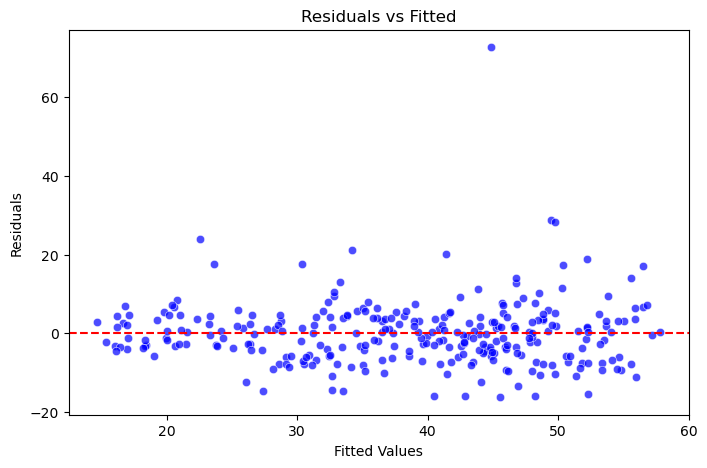

In [232]:
# Residuals
residuals = poly_model.resid
fitted_values = poly_model.fittedvalues

# 1. Residuals vs Fitted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, color="blue", alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

## 2. QQ Plot (Normality of Residuals)

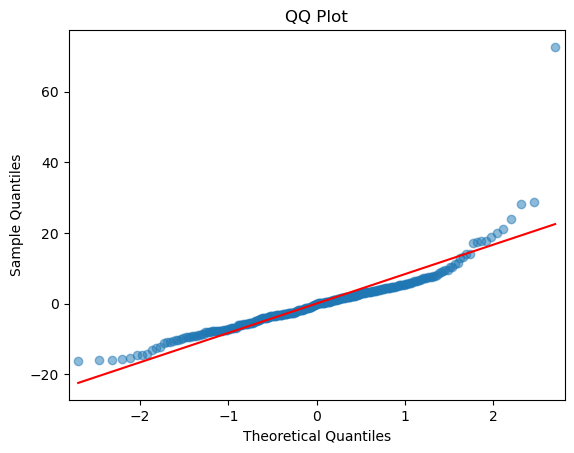

In [231]:
from statsmodels.graphics.gofplots import qqplot

# Generate the QQ plot
residuals = poly_model.resid
qqplot(residuals, line="s", alpha=0.5)
plt.title("QQ Plot")
plt.show()


## 3. Scale-Location Plot (Spread of Residuals)

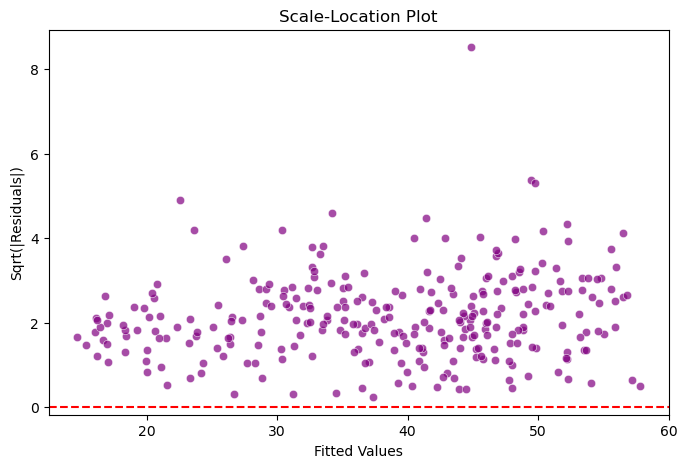

In [233]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=np.sqrt(np.abs(residuals)), color="purple", alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt(|Residuals|)")
plt.title("Scale-Location Plot")
plt.show()

## 4. Cook's Distance Plot

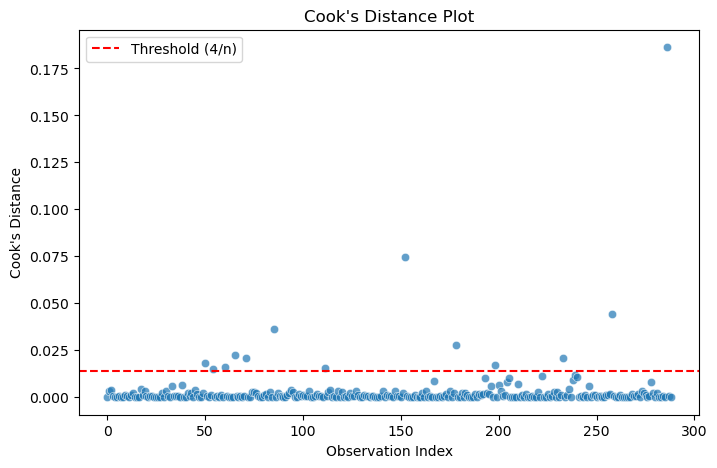

In [234]:
influence = poly_model.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=range(len(cooks_d)), y=cooks_d, alpha=0.7)
plt.axhline(4 / len(cooks_d), color="red", linestyle="--", label="Threshold (4/n)")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()

## 5. Influence Plot

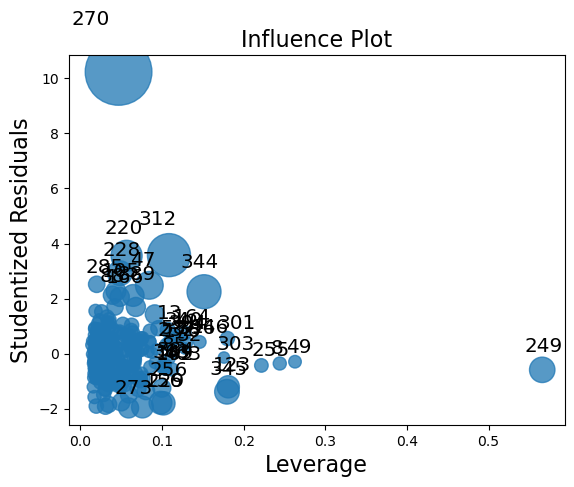

In [235]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(poly_model)
plt.show()

### Conclusion: After Checking both the linear and polynomial regression(degree 2), we find that linear regression is giving almost similar accuracy as the polynomial model and it is also able to explain 55% variation in the dataset and since, both the models follow the the Normality assumptions very weakly, We think that linear regression will be appropriate for the given dataset as it is less complex and easily interpretable.